In [1]:
import numpy as np
import pandas as pd
import sklearn
 
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

# Prétraitement
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
 
# Prétraitement
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
 
# Modèles de Machine Learning
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

import joblib
from sklearn.tree import export_text
 
# Évaluation des modèles
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    mean_squared_error,
    r2_score
)

In [2]:
data = pd.read_csv("Clean_Dataset.csv")

data = data[data['class_ticket'] != 'Business']
data.drop(columns=['class_ticket'], inplace=True)

print(data.head(10))

column_nan_count = data.isnull().sum()
print("NaN count per column:")
print(column_nan_count)

   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   
5           5   Vistara   UK-945       Delhi        Morning  zero   
6           6   Vistara   UK-927       Delhi        Morning  zero   
7           7   Vistara   UK-951       Delhi      Afternoon  zero   
8           8  GO_FIRST   G8-334       Delhi  Early_Morning  zero   
9           9  GO_FIRST   G8-336       Delhi      Afternoon  zero   

    arrival_time destination_city  duration  days_left  price  
0          Night           Mumbai      2.17          1   5953  
1        Morning           Mumbai      2.33          1   5953  
2  Early_Morning           Mumbai      2.17     

In [3]:
print(data.describe())

          Unnamed: 0       duration      days_left          price
count  206666.000000  206666.000000  206666.000000  206666.000000
mean   103332.500000      11.550060      26.123673    6572.342383
std     59659.479704       7.241284      13.529610    3743.519517
min         0.000000       0.830000       1.000000    1105.000000
25%     51666.250000       6.250000      15.000000    4173.000000
50%    103332.500000      10.170000      26.000000    5772.000000
75%    154998.750000      15.250000      38.000000    7746.000000
max    206665.000000      49.830000      49.000000   42349.000000


In [4]:
print(data.info())

<class 'pandas.DataFrame'>
RangeIndex: 206666 entries, 0 to 206665
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        206666 non-null  int64  
 1   airline           206666 non-null  str    
 2   flight            206666 non-null  str    
 3   source_city       206666 non-null  str    
 4   departure_time    206666 non-null  str    
 5   stops             206666 non-null  str    
 6   arrival_time      206666 non-null  str    
 7   destination_city  206666 non-null  str    
 8   duration          206666 non-null  float64
 9   days_left         206666 non-null  int64  
 10  price             206666 non-null  int64  
dtypes: float64(1), int64(3), str(7)
memory usage: 17.3 MB
None


# Colonnes :
    - Unnamed: index, int (TO DELETE)
    - airline : nom compagnie aérienne, char (MAYBE to delete)
    - flight : numéro de vol, char composé de chiffres et de lettres "ex : AA1234" (TO DELETE)
    - source_city : aéroport de départ, char
    - departure_time : heure de départ, char ("Early_Morning", "Morning", "Afternoon", "Evening", "Night")
    - stop : nombre d'escales, int
    - arrival_time : heure d'arrivée, char ("Early_Morning", "Morning", "Afternoon", "Evening", "Night")
    - destination_city : aéroport d'arrivée, char
    - duration : durée du vol en minutes, flot
    - days_left : nombre de jours avant le départ, int
    - price : prix du billet, int = rupies indiennes

In [5]:
df = data.drop(columns=['Unnamed: 0'], inplace=False)
df = df.drop(columns=['flight'], inplace=False)
# df = df.drop(columns=['airline'], inplace=False)

## Duplicates et valeurs manquantes

In [6]:
duplicate_count = df.duplicated().sum()
missing_values = df.isnull().sum()

df.drop_duplicates(inplace=True)
print(f"Nombre de doublons supprimés : {duplicate_count}")
print("Valeurs manquantes par colonne :")
print(missing_values)

Nombre de doublons supprimés : 1899
Valeurs manquantes par colonne :
airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
duration            0
days_left           0
price               0
dtype: int64


### Grape pour voir les données aberrantes et la distribution des données

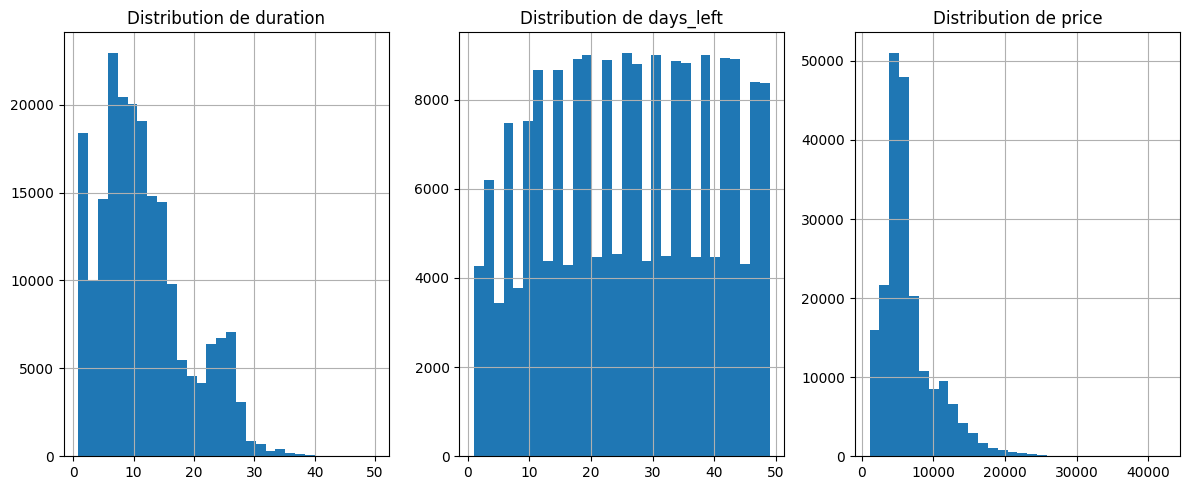

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
df.hist(column='duration', bins=30, ax=axes[0])
df.hist(column='days_left', bins=30, ax=axes[1])
df.hist(column='price', bins=30, ax=axes[2])
axes[0].set_title('Distribution de duration')
axes[1].set_title('Distribution de days_left')
axes[2].set_title('Distribution de price')
plt.tight_layout()
plt.show()

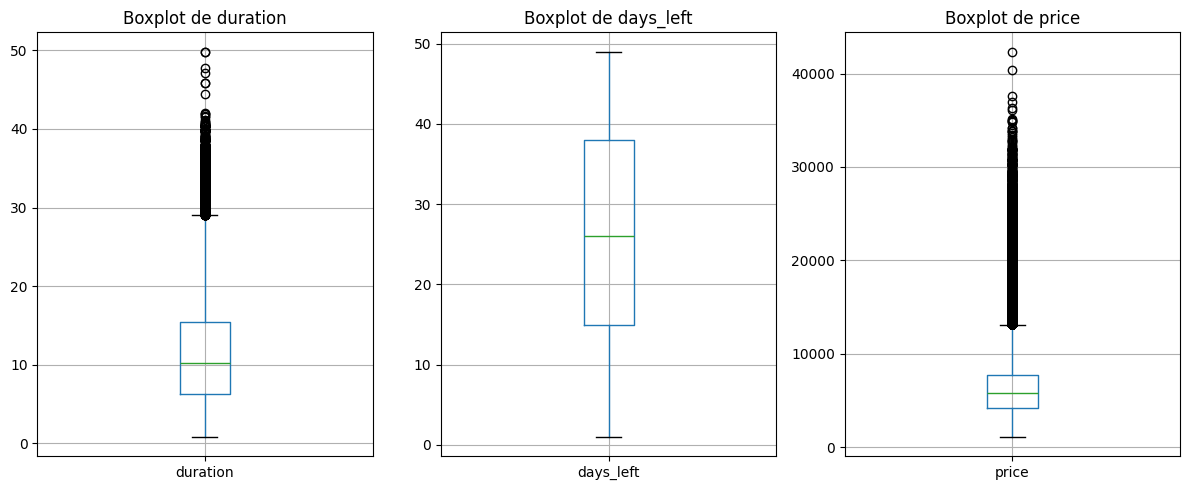

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
df.boxplot(column='duration', ax=axes[0])
df.boxplot(column='days_left', ax=axes[1])
df.boxplot(column='price', ax=axes[2])
axes[0].set_title('Boxplot de duration')
axes[1].set_title('Boxplot de days_left') 
axes[2].set_title('Boxplot de price') 
plt.tight_layout()
plt.show()

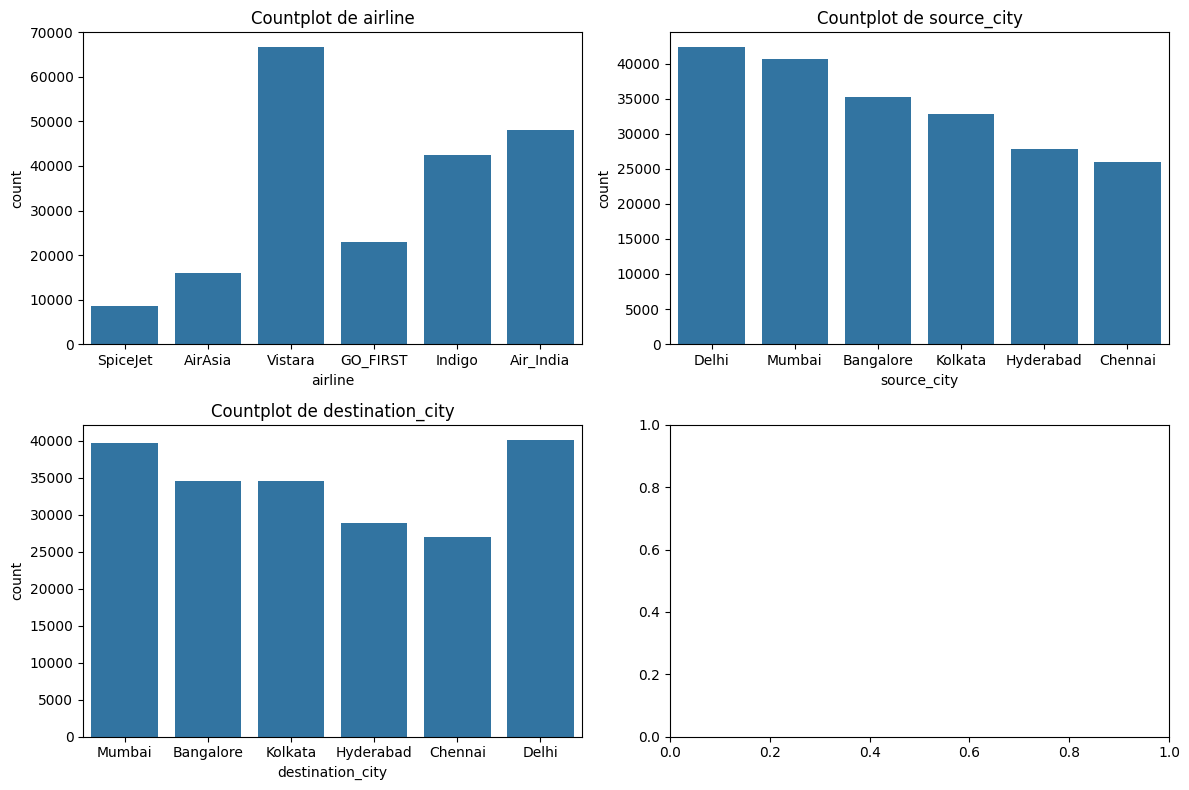

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.countplot(x=df['source_city'], ax=axes[0, 1])
axes[0, 1].set_title('Countplot de source_city')
sns.countplot(x=df['destination_city'], ax=axes[1, 0])
axes[1, 0].set_title('Countplot de destination_city')
sns.countplot(x=df['airline'], ax=axes[0, 0])
axes[0, 0].set_title('Countplot de airline')
plt.tight_layout()
plt.show()

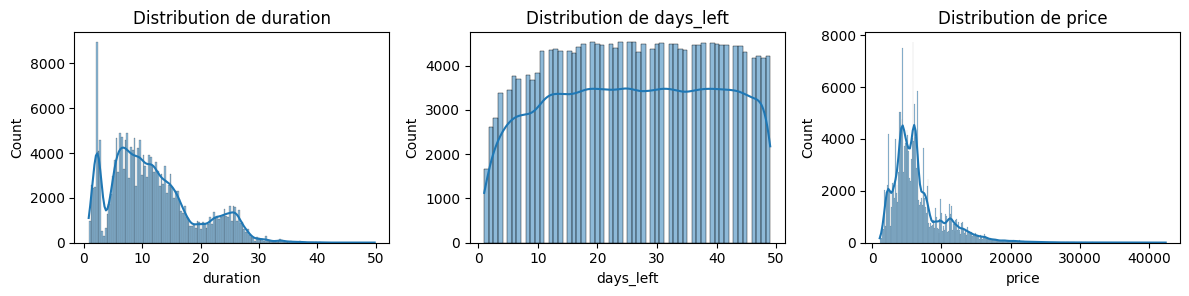

In [10]:
df_num = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
for i, column in enumerate(df_num.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_num[column], kde=True)
    plt.title(f'Distribution de {column}')
plt.tight_layout()
plt.show()

Example avec la transformation des categories avec OrdinalEncoder et la visualisation de la distribution des prix en fonction de la classe de voyage :

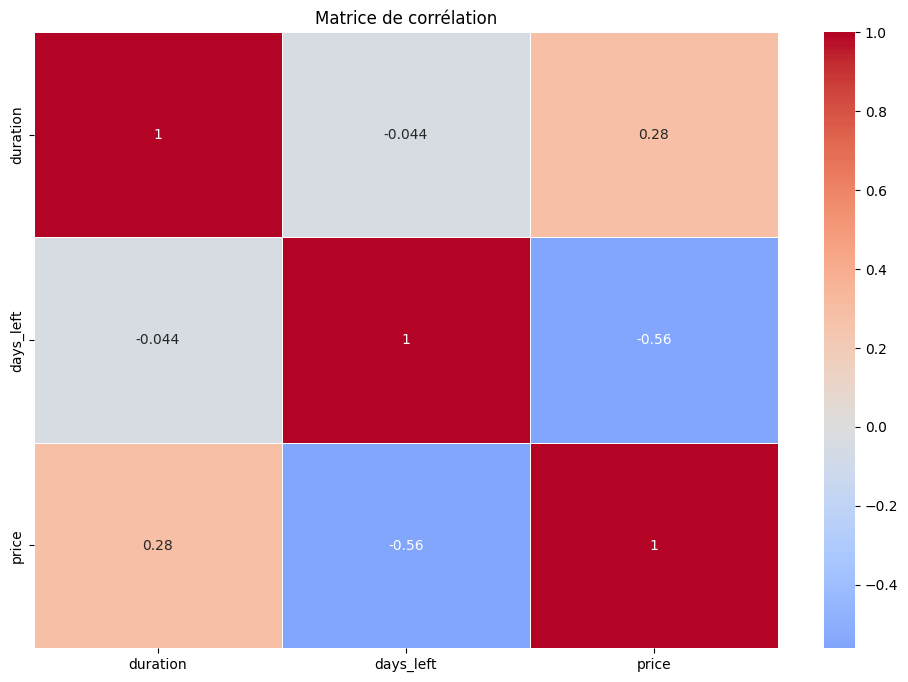

In [11]:
df_num = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()

C:\Users\amina\AppData\Local\Temp\ipykernel_97200\1862996289.py:3: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df2.select_dtypes(include=['object']).columns


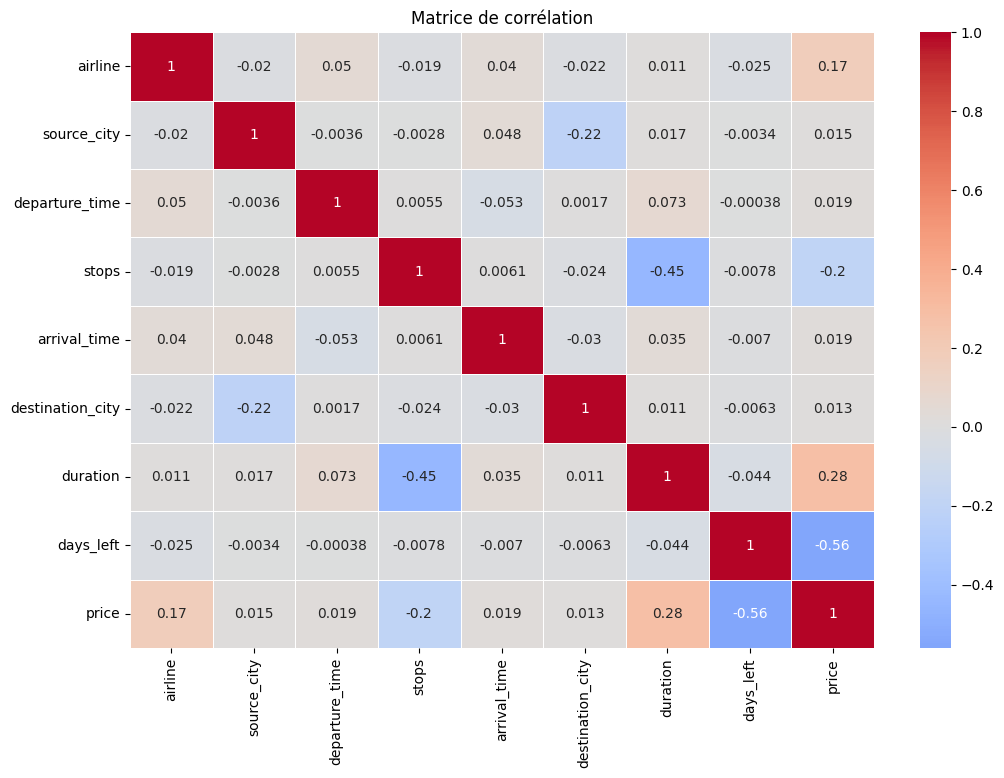

In [12]:
df2 = df.copy()
#encode les variables catégorielles using ordinal encoder
categorical_cols = df2.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = OrdinalEncoder()
    df2[col] = le.fit_transform(df2[col].values.reshape(-1, 1))

plt.figure(figsize=(12, 8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()

C:\Users\amina\AppData\Local\Temp\ipykernel_97200\2795094110.py:3: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df3.select_dtypes(include=['object']).columns


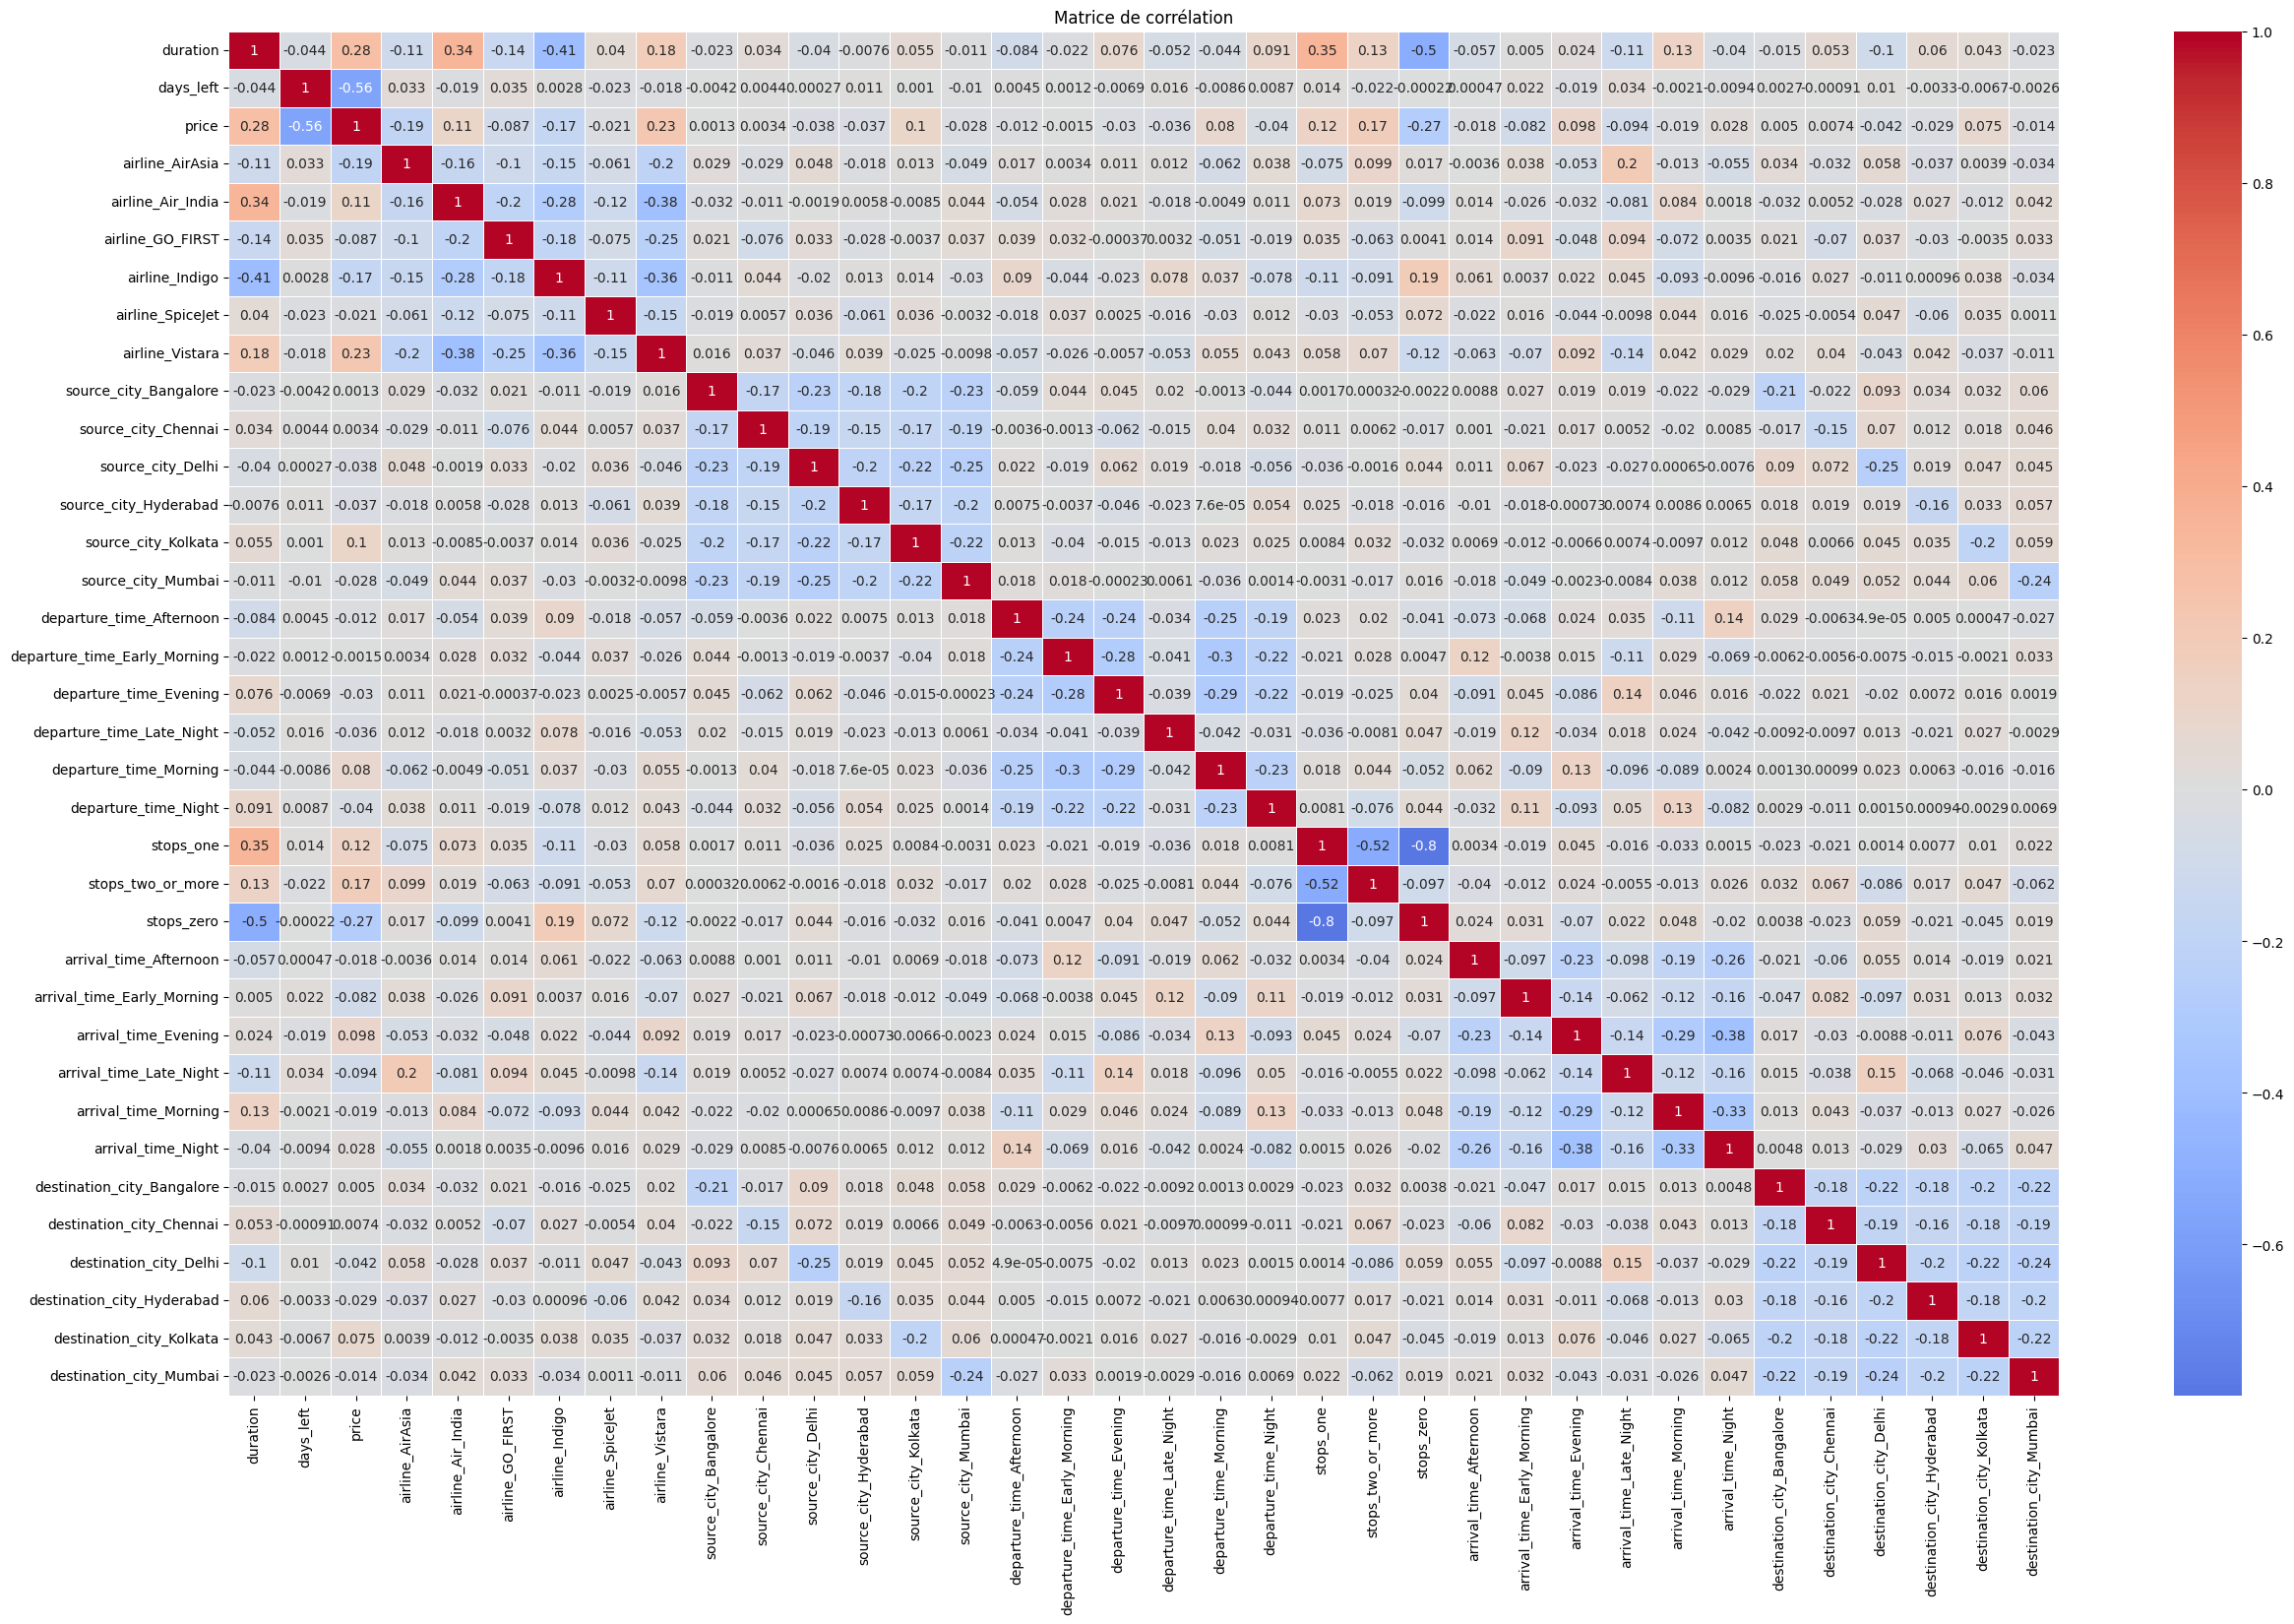

In [13]:
df3 = df.copy()
#encode les variables catégorielles using one hot encoder
categorical_cols = df3.select_dtypes(include=['object']).columns
df3 = pd.get_dummies(df3, columns=categorical_cols)

plt.figure(figsize=(30, 18))
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()

In [14]:
print(df.columns)

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'duration', 'days_left', 'price'],
      dtype='str')


In [15]:
X = df.drop(columns=['price'])
y = df['price']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
num_cols = X.select_dtypes(include=[np.number]).columns
categorical_cols = X.select_dtypes(include=['object']).columns

num_preprocess = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
], verbose=True)

cat_process = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder(handle_unknown='ignore'))
], verbose=True)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_preprocess, num_cols),
        ("cat", cat_process, categorical_cols)
    ], remainder='passthrough', 
    verbose_feature_names_out=False
)

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", rf)
], verbose=True)

C:\Users\amina\AppData\Local\Temp\ipykernel_97200\3065506699.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = X.select_dtypes(include=['object']).columns


In [18]:
print(pipeline)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())],
                                                           verbose=True),
                                                  Index(['duration', 'days_left'], dtype='str')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
            

In [19]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")

[Pipeline] ........... (step 1 of 2) Processing imputer, total=   0.2s
[Pipeline] ............ (step 2 of 2) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 2) Processing imputer, total=   0.9s
[Pipeline] ........... (step 2 of 2) Processing encoder, total=   1.1s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   2.4s
[Pipeline] ............. (step 2 of 2) Processing model, total= 8.5min
RMSE: 1374.8570091387
R²: 0.8657564133180247


In [20]:
imputer = pipeline.named_steps['preprocessor'].named_transformers_['num'].named_steps['imputer']
imputer_categories = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['imputer']
print(dict(zip(num_cols, imputer.statistics_)))
print(dict(zip(categorical_cols, imputer_categories.statistics_)))

{'duration': np.float64(10.25), 'days_left': np.float64(26.0)}
{'airline': 'Vistara', 'source_city': 'Delhi', 'departure_time': 'Morning', 'stops': 'one', 'arrival_time': 'Night', 'destination_city': 'Delhi'}


In [21]:
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
rf_model = pipeline.named_steps['model']
importances = rf_model.feature_importances_

importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)
print(importances_df.head(10))

                     feature  importance
1                  days_left    0.508386
0                   duration    0.191566
3          airline_Air_India    0.031514
2            airline_AirAsia    0.025246
7            airline_Vistara    0.023491
5             airline_Indigo    0.017940
12       source_city_Kolkata    0.013031
20                 stops_one    0.012433
21         stops_two_or_more    0.011814
33  destination_city_Kolkata    0.011150


In [22]:
joblib.dump(pipeline, 'random_forest_flights_economy.pkl')

['random_forest_flights_economy.pkl']

In [23]:
loaded_model = joblib.load('random_forest_flights_economy.pkl')
y_pred_loaded = loaded_model.predict(X_test)

print(f"R² Score (loaded model): {r2_score(y_test, y_pred_loaded)}")

R² Score (loaded model): 0.8657564133180247


In [24]:
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
tree = pipeline.named_steps['model'].estimators_[0]

print(export_text(tree, feature_names=list(feature_names), max_depth=4))

|--- days_left <= -0.79
|   |--- duration <= -0.99
|   |   |--- duration <= -1.28
|   |   |   |--- days_left <= -1.67
|   |   |   |   |--- days_left <= -1.82
|   |   |   |   |   |--- truncated branch of depth 12
|   |   |   |   |--- days_left >  -1.82
|   |   |   |   |   |--- truncated branch of depth 15
|   |   |   |--- days_left >  -1.67
|   |   |   |   |--- duration <= -1.38
|   |   |   |   |   |--- truncated branch of depth 18
|   |   |   |   |--- duration >  -1.38
|   |   |   |   |   |--- truncated branch of depth 24
|   |   |--- duration >  -1.28
|   |   |   |--- days_left <= -1.67
|   |   |   |   |--- duration <= -1.06
|   |   |   |   |   |--- truncated branch of depth 20
|   |   |   |   |--- duration >  -1.06
|   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |--- days_left >  -1.67
|   |   |   |   |--- duration <= -1.23
|   |   |   |   |   |--- truncated branch of depth 20
|   |   |   |   |--- duration >  -1.23
|   |   |   |   |   |--- truncated branch of depth 